In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files 
uploaded=files.upload()

Saving matches.csv to matches.csv


In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving deliveries.csv to deliveries.csv


In [ ]:
data=pd.read_csv('deliveries.csv')
data.head()

In [2]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print(df.shape)

(756, 18)


In [ ]:
print(data.shape)

(179078, 21)


In [ ]:
New_data=data.rename(columns={'match_id':'id'},inplace=False)
New_data

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
DF=pd.merge(left=df,right=New_data)
print(DF.shape)
DF.head()

(179078, 38)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


Toss decision

In [9]:
print('Toss Decisions in %\n',((df['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    80.242634
bat      50.779896
Name: toss_decision, dtype: float64


In [11]:
import matplotlib.pyplot as mlt

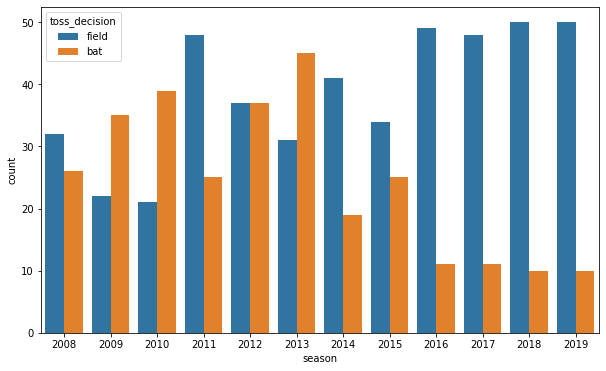

In [14]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=df)
mlt.show()


What is the maximum number of wins by any team in particular seasons? 



In [4]:
teams_per_season=df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [5]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   


((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [6]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


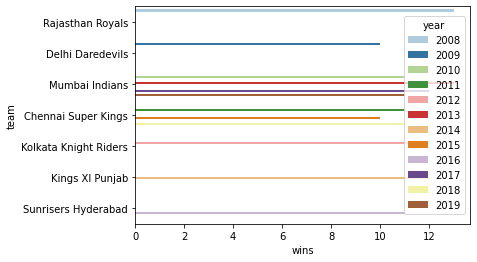

In [7]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

Which stadium hosted the most number of IPL matches?
Explore value_counts() function in PD and make a separate df with columns “venue” and “matches”. Make a bar plot with Seaborn / Plotly. (Take help from (1) in EDA resources and from (5) for plotly plots)



In [8]:
No_of_IPL_matches=df['venue'].value_counts()
No_of_IPL_matches

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [ ]:
import plotly.graph_objs as go

In [ ]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
X= pd.DataFrame(df['venue'].value_counts()).reset_index()
display(X.head())

,index,venue
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


In [ ]:
X_new=X.rename(columns={'index':'Stadium','venue':'Total_matches'},inplace=False)
X_new

,Stadium,Total_matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [ ]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [ ]:
Total_matches= go.Bar(
                    x=X_new['Stadium'],
                    y=X_new['Total_matches'],
                    #mode='lines',
                    marker = dict(color = random_colors(len(X_new['Stadium'].value_counts().index)),line=dict(color='#000000', width=1)),

                    name='runs'
                    )
layout = go.Layout(autosize=False,
                      width=800,
                      height=400,
                  title='The number of IPL matches hosted',
                  xaxis = dict(title='stadium'),
                  yaxis = dict(title='Total matches'))

fig = go.Figure(data=[Total_matches], layout=layout)

pyo.iplot(fig)

Eden Gardens hosted the most number of IPL matches.


Which team has won the most number/percentage of matches?


In [ ]:
most_wins=df['winner'].value_counts()
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
most_wins_plot = [go.Bar(
    x = df['winner'].value_counts().index,
    y = df['winner'].value_counts().values,
    marker = dict(color = random_colors(len(df['winner'].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most Wins by a team',
                      xaxis = dict(title='Teams'),
                      yaxis = dict(title='Wins'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_wins_plot,layout = layout)
iplot(fig)

Which player has won the most number of Man of the Match (MoM) awards?

In [ ]:
MoM=df['player_of_match'].value_counts()
MoM

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
M Kartik           1
K Rabada           1
J Theron           1
TA Boult           1
MR Marsh           1
Name: player_of_match, Length: 226, dtype: int64

In [ ]:
most_mom_plot = [go.Bar(
    x = df['player_of_match'].value_counts()[:20].index,
    y = df['player_of_match'].value_counts()[:20].values,
    marker = dict(color = random_colors(20),line=dict(color='#000000', width=1.5))
)]


layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most Man of the Matches',
                      xaxis = dict(title='Players'),
                      yaxis = dict(title='MoM Awards'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_mom_plot, layout=layout)
iplot(fig)

 CH Gayle has won the most number of Man of the Match (MoM) awards?



Which team has won the most tosses?


In [ ]:
toss_ser = df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [ ]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


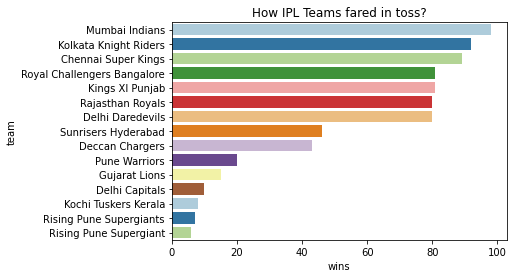

In [ ]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

Mumbai Indians has won most tosses.

In [ ]:
def team1_vs_team2(team1,team2):
    mt1=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()



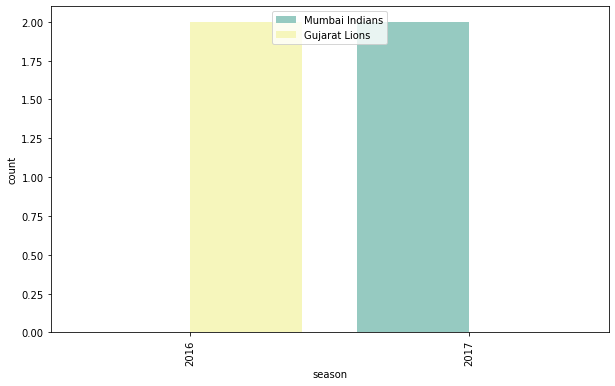

In [ ]:
team1_vs_team2('Gujarat Lions','Mumbai Indians')


Most 50s and 100s scored.


In [ ]:
s_man_of_match = (df.groupby(df.player_of_match).player_of_match.count().
                  sort_values(ascending=False).head(15))

df_man_of_match =(s_man_of_match.to_frame().rename
                  (columns = {"player_of_match": "times"}).reset_index())

cen = data.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

half_cen = data.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)

df_strike_rate = data.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)

df_runs_per_match = data.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_runs_per_match = data.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

df_sixes = data[['batsman','batsman_runs']][data.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = data[['batsman','batsman_runs']][data.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count',
                                  'average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat = df_batsman_stat.sort_values(by='Batsman Run',ascending=False).reset_index()

batsman_stats = pd.merge(df_batsman_stat,df_big, on='batsman',how='left').fillna(0)
batsman_stats.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [ ]:
centuries = batsman_stats.sort_values(by='100s').tail(15)
half_centuries = batsman_stats.sort_values(by='50s').tail(15)


In [ ]:
fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                                "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)